In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load data
data = datasets.load_digits()

In [3]:
x = data.data / 16
y = data.target

# 进行KNN

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 666)
model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9888888888888889

# 显示一张image

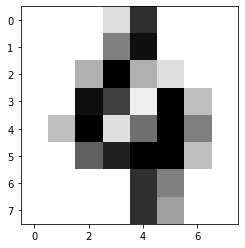

4

In [5]:
# show a image
import matplotlib
image_one = x[100].reshape(8,-1)
plt.imshow(image_one, cmap = matplotlib.cm.binary)
plt.show()
y[100]

# 寻找最好的超参数  using grid search

In [6]:
#参数集合
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]

In [7]:
knn_clf = KNeighborsClassifier()

In [8]:
# 寻找最佳参数的函数
from sklearn.model_selection import GridSearchCV

In [9]:
grid_search = GridSearchCV(knn_clf, param_grid = param_grid, cv=5, n_jobs=-1, verbose=10)

In [10]:
%%time
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1892s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1486s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0548s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:  

Wall time: 13.2 s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [11]:
# 最好的参数
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [12]:
# 最好的分数
grid_search.best_score_

0.9853862212943633

In [13]:
# 获得最好的模型
best_model = grid_search.best_estimator_

In [14]:
best_model.score(x_test,y_test)

0.9833333333333333